In [1]:
from DataManager import DataManager, RunManager, ChunkManager
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
import pandas as pd
import matplotlib.path as mplPath


In [2]:
class tbjcChunkManager(ChunkManager):
    def _fineCalibrationE(self, E, Z, trigger_ch, FinerE_cal):    

        E -= Z*0.09345+8.811369-8
        k = FinerE_cal.k.values[trigger_ch]
        b = FinerE_cal.b.values[trigger_ch]
        E = k*E+b

        E += Z*0.08395+0.8395472703062584
        E -= Z*0.09345+8.811369-7.876868999999999;
        E = E*1.0253403882555403-0.40544218689551104;
        E += Z*0.09345+0.9345;
        E  =-( E - ((Z-10)* 0.09423361+6.8701585 ))+2.796;
        E = (-E + 7.89293)*1.04804+0.35;

        return E

In [3]:
calibration_inputs = {'z_cal':      {'positions': [-6.176,-12.076,-17.976,-23.866,-29.796,-35.656], 'shift':-9.074},
                      'XNXF_cal':   'data/slope_factor.dat',
                      'E_cal':      'data/factors.dat',
                      'TAC_cal':    'data/tacshift.dat',
                      'TDC_cal':    'data/xTDCcurve.dat',
                      'RF_cal':     {'RF_shift':1648},
                      'FinerE_cal': 'data/FinerCD2.dat',
                     }

base = '../SQL/data/'

dm = DataManager([base+'{:03d}.hdf5'.format(_) for _ in range(33,36)], 
                 calibration_inputs, 
                 tbjcChunkManager, chunksize=50000)

Opening ../SQL/data/033.hdf5 in read-only mode
Opening ../SQL/data/034.hdf5 in read-only mode
Opening ../SQL/data/035.hdf5 in read-only mode


In [4]:
cut = pd.read_csv('data/cut.dat', delimiter='\s', header=None, names=['x','y'])
cut = mplPath.Path(cut.values)

#cut.contains_points(dm.data[['TAC','']])

/home/tbjc1magic/lsu_data/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


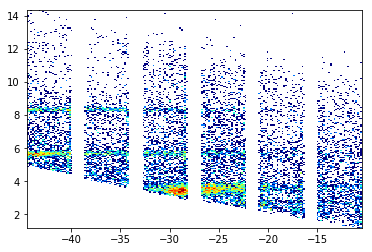

In [5]:
import matplotlib.colors as mcolors
data = dm.data
mask1 = (data.Z>-100)&(data.Z<0)&(data.TAC>1650)&(data.TAC<1900)&(data.E>1)
mask2 = ((data.RF1<800)&(data.RF1>200))|(data.RF2<800)&(data.RF2>200)
mask = mask1&mask2
plt.hist2d(data.Z[mask], data.fE[mask],bins=200, norm=LogNorm(), cmap=plt.cm.jet);

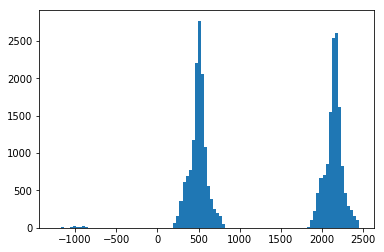

In [6]:
RF = np.concatenate([data[mask].RF1, data[mask].RF2])
plt.hist(RF[RF<1e5], bins=100);

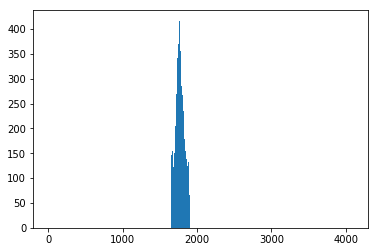

In [7]:
plt.hist(data.TAC[mask],bins=np.linspace(0,4096,1024));

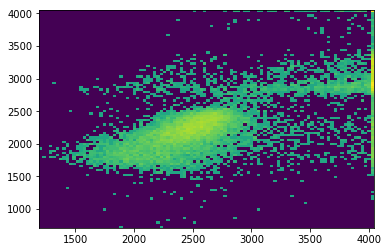

In [8]:
plt.hist2d(data.IC1[mask], data.IC2[mask], bins=100, norm=mcolors.PowerNorm(0.1));

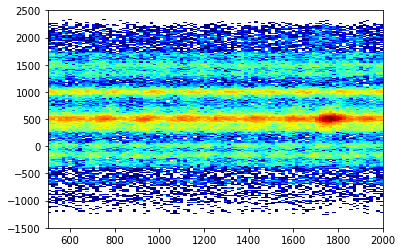

In [9]:
plt.hist2d(data.TAC, data.RF1, bins=[np.linspace(500,2000,100), np.linspace(-1500,2500,200)],
           norm=LogNorm(), cmap=plt.cm.jet);

In [10]:
data.head()

,E,RF1,RF2,TAC,X,Z,fE,trigger_ch,IC0,IC1,IC2,IC3
0,0.381027,-8.867467e+02,7.612533e+02,-210.616362,0.758673,-23.256636,1.791036,15,1679,2574,2187,1530
1,0.363936,9.109803e+14,9.109803e+14,-209.616362,-1000.000000,-1000.000000,108.866574,15,995,2495,2353,1285
2,0.316084,-9.626688e+02,6.853312e+02,-209.616362,0.858606,-22.756968,1.667720,15,1151,2495,2285,1526
3,0.203865,6.795316e+15,6.795316e+15,52.121524,-1000.000000,-1000.000000,112.332301,11,1058,2437,2326,1420
4,0.326338,9.109803e+14,9.109803e+14,-209.616362,-1000.000000,-1000.000000,108.826898,15,855,2551,2229,1608
